## 🧠 Insights احم احم
### How does price range correlate with customer ratings?

### Do restaurants with few ratings ever display high scores?

### Which restaurants have the highest scores overall?

### What is the average menu price by price category?

### Do menu prices vary more within cheap or expensive restaurants?


### Start with Price range correlation with Customer ratings

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed/processed_restaurants_logged.csv')

# Remove NaN from score 3shan n7sb sa7
df_valid = df[df['score'].notna()].copy()



## Visualize Scores by Price Range with Boxplot

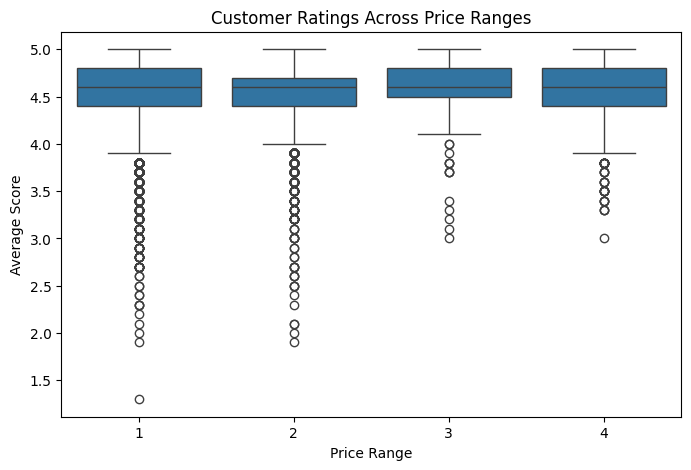

In [98]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_valid, x='price_range', y='score', order=['1', '2', '3', '4'])
plt.title('Customer Ratings Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Average Score')
plt.show()

# Describe scores per group

In [99]:
df_valid.groupby('price_range')['score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
1,26312.0,4.56,0.30,1.3,4.4,4.6,4.8,5.0
2,7324.0,4.52,0.32,1.9,4.4,4.6,4.7,5.0
3,250.0,4.57,0.32,3.0,4.5,4.6,4.8,5.0
4,1132.0,4.55,0.29,3.0,4.4,4.6,4.8,5.0


# CORELLATION ANALYSIS

In [100]:
correlation = df_valid[['price_range', 'score']].corr().iloc[0, 1]
print(f"Correlation between price level and average score: {correlation:.3f}")

if correlation > -0.05 and correlation < 0.05:
    print("No or very weak correlation between price level and average score.")
elif correlation > 0.05:
    print("Positive correlation between price level and average score.")


Correlation between price level and average score: -0.032
No or very weak correlation between price level and average score.


# -----------------------

## Do restaurants with few ratings ever display high average scores?

### We want to detect potential bias where restaurants with low count of ratings has high scores 
###    for reasons like family/friends members rating the restaurants with bias

### First we Filter out the restaurants with few ratings but high scores 
###     lets say <20 ratings is low with a score of > 4.5 is reason to believe there is bias 

In [101]:
df_few_high = df_valid[ ## few عشان few count ratings و high عشان high score
    (df_valid['ratings'] <= 25) &
    (df_valid['score'] >= 4.5)
]


## Show the sample

In [102]:
df_few_high[['name', 'score', 'ratings', 'price_range']].sort_values(by='score', ascending=False)


,name,score,ratings,price_range
28131,Subway (10433 Midlothian Tpke),5.0,11.0,1
28121,McDonald's (420 Mcneil Drive),5.0,10.0,1
15,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,3
29785,Teriyaki Madness - 788 North 800 E,5.0,12.0,1
26869,Walgreens (9271 Sudley Rd),5.0,17.0,1
...,...,...,...,...
50115,Saigon Alley,4.5,17.0,1
49905,German Pub,4.5,18.0,2
62197,The Olive Garden,4.5,15.0,2
61895,Burger King (236 W I H 35),4.5,20.0,1


# Plot it

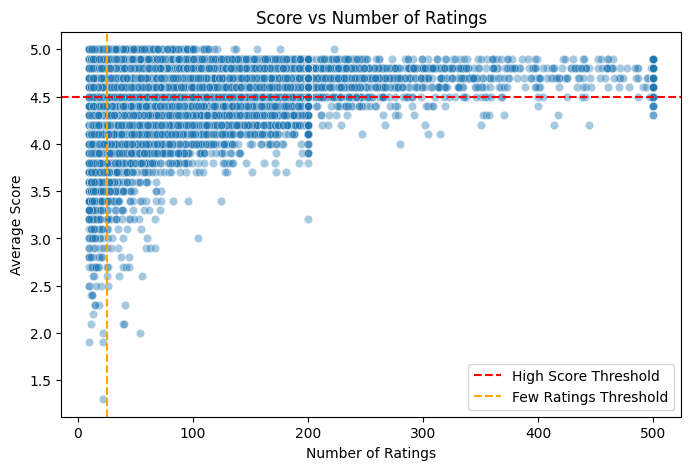

In [103]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_valid, x='ratings', y='score', alpha=0.4)
plt.axhline(4.5, color='red', linestyle='--', label='High Score Threshold')
plt.axvline(25, color='orange', linestyle='--', label='Few Ratings Threshold')
plt.title('Score vs Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Score')
plt.legend()
plt.show()

### We found that 5454 restaurants had a score ≥ 4.5 but only 20 or fewer ratings.

### This suggests some bias but might not be reliable due to a small sample size.


### Save our findings in a csv file 

In [104]:
df_few_high.to_csv('data/processed/few_ratings_high_score.csv', index=False)


# Which restaurants have the highest scores overall?

### first we sort by score and ratings to get overall highest rated restaurant

In [105]:
df_top_sorted = df_valid.sort_values(by=['score', 'ratings'], 
    ascending=[False, False])


### Now we Show the top 10 of data

In [106]:
df_top_sorted[['name', 'score', 'ratings', 'price_range']].head(10)


,name,score,ratings,price_range
18252,Starbucks (S. Van Dorn and Pickett),5.0,223.0,1
28336,Sundevich,5.0,176.0,1
22937,Berries &amp; Bowls,5.0,156.0,1
22710,Starbucks (South Riding Blvd),5.0,137.0,1
19763,Open Road (ROSSLYN),5.0,136.0,1
43566,Delightful Donut,5.0,121.0,1
47027,Smoothie King (5000 Belt Line Road),5.0,118.0,1
35034,Cafe Vida (Rogers Ranch),5.0,114.0,1
62360,Purify Bowls &amp; Smoothies,5.0,113.0,1
11878,Banh Mi Up,5.0,112.0,1


## Plot for top 10

C:\Users\youse\AppData\Local\Temp\ipykernel_73432\3915190589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='name', x='ratings', palette='coolwarm')


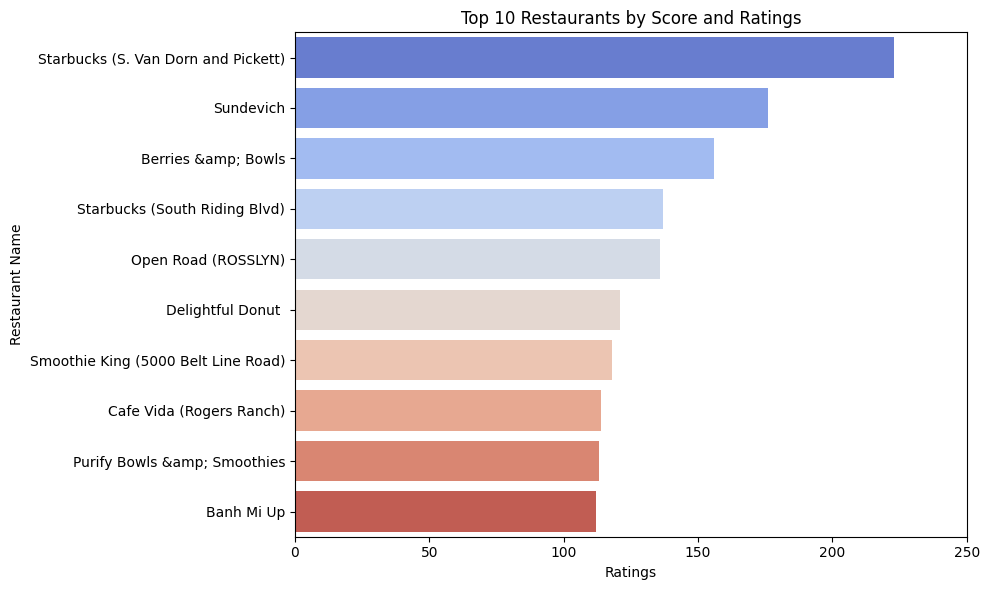

In [ ]:
top_10 = df_top_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y='name', x='ratings', palette='coolwarm')
plt.title('Top 10 Restaurants by Score and Ratings')
plt.xlabel('Ratings')
plt.ylabel('Restaurant Name')
plt.xlim(0,250)
plt.tight_layout()
plt.show()
